<a href="https://colab.research.google.com/github/imthiyazg/Datascience/blob/main/CNNclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course Work 2** 
**Task 1: Computer Vision** 
Matriculation ID: 40518428

**Importing**  **Libraries**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Data Preprocessing**  
Download and prepare the CIFAR10 dataset.
The CIFAR10 dataset provides 60,000 color images in ten diffrent  classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.
Download the Data set from provided link and loaded them in to train_images ,trian_labels , test_images and test_images .
Once dowbload the we normalized the pixel values to be between 0 to 1 by dividing them by 255.0

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


**Verify the data**

 plot the first 10 images from the training set and display the class name below each image:

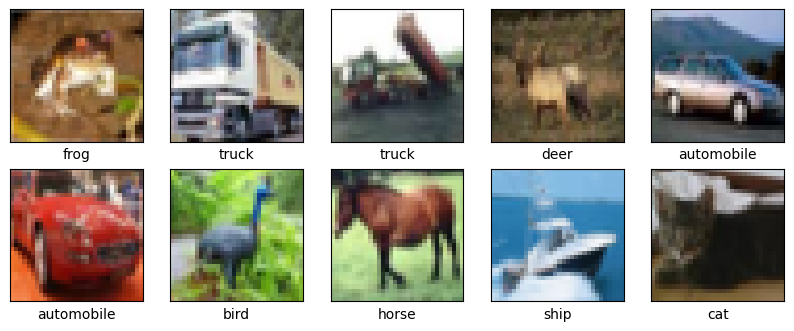

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Create the convolutional base**
 code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

We have added Sequencial model 2D , in the first layer 32 filter and filter size of 3*3 and the activation ReLU and the inputshape is 32x32x3(RGB)
We have added 3 conv layers and simultaniously with 3 Max pooling layers with the filter size of 2x2

Buil the model with 2 conv layers with 2 max pooling layers and measure the performace. Next step we will add one more conv layer to see if the performance increases . if the performance increase we will stick with the model for predictions

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 85s 53ms/step - loss: 1.4351 - accuracy: 0.4846 - val_loss: 1.1947 - val_accuracy: 0.5803
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0894 - accuracy: 0.6188 - val_loss: 1.0365 - val_accuracy: 0.6378
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9699 - accuracy: 0.6631 - val_loss: 0.9937 - val_accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8923 - accuracy: 0.6895 - val_loss: 0.9485 - val_accuracy: 0.6733
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8247 - accuracy: 0.7103 - val_loss: 0.9221 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7728 - accuracy: 0.7312 - val_loss: 0.8799 - val_accuracy: 0.6962
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7215 - accuracy: 0.7474 - val_loss: 0.8987 -

Addded one more 3 Conv2D layer with Max pooling 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


**Let's display the architecture of your model so far:**

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 64)        

Above, you can see that the output of every Conv2D and MaxPooling2D layer 

**Add Dense layers on top** ( Fully connected Layer with Activation function )

. We have added two fully connected layers (Dense layers) . FC Layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten  the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 64)        

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

**Compile and train the model** Model with 3 conv layers performed better Almost 70% accuracy in prediction . 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 80s 50ms/step - loss: 1.5404 - accuracy: 0.4390 - val_loss: 1.2780 - val_accuracy: 0.5448
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1915 - accuracy: 0.5782 - val_loss: 1.1789 - val_accuracy: 0.5820
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0487 - accuracy: 0.6305 - val_loss: 1.0784 - val_accuracy: 0.6216
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9535 - accuracy: 0.6663 - val_loss: 0.9925 - val_accuracy: 0.6587
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8827 - accuracy: 0.6926 - val_loss: 0.9320 - val_accuracy: 0.6764
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8251 - accuracy: 0.7121 - val_loss: 0.9445 - val_accuracy: 0.6668
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7758 - accuracy: 0.7288 - val_loss: 0.9221 -

313/313 - 4s - loss: 0.8783 - accuracy: 0.7063 - 4s/epoch - 12ms/step


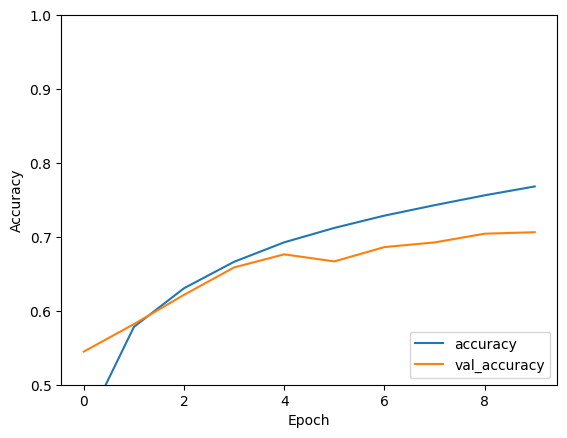

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7063000202178955


**Predicticting the results using the model** 

In [ ]:
prediction= model.predict (test_images)


313/313 [==============================] - 4s 12ms/step


1/1 [==============================] - 0s 26ms/step
deer
100


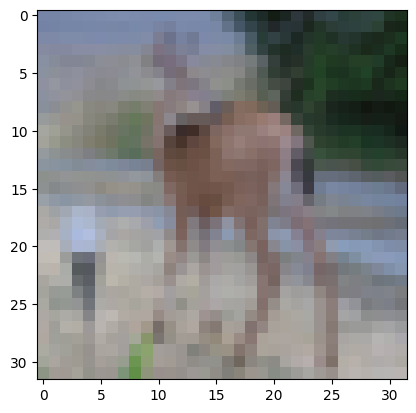

In [ ]:
# label mapping
import numpy as np
import matplotlib.pyplot as plt

import numpy
# select the image from our test dataset
image_number = 100

# display the image
plt.imshow(test_images[image_number])

# load the image in an array
n = np.array(test_images[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = class_names[model.predict(p).argmax()]

# load the original label
#original_label = class_names[test_images[image_number]]

# display the result
print(predicted_label)
print(image_number)





Text(0.5, 0, 'deer')

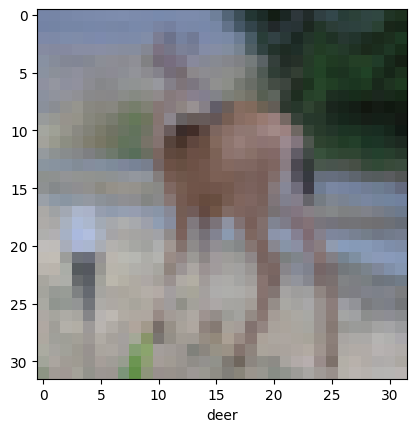

In [ ]:
plt.imshow(test_images[image_number])
plt.xlabel(class_names[test_labels[image_number][0]])

**Transfer learning **
Take layers from a previously trained model.( VGG16)
Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
Train the new layers on your dataset.


In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

optimizer = SGD(learning_rate=0.0001)

#Include top = False ==> it does not include the last three fully connected layers originally used to pretrain on imasgenet.
#weights ==> 'imagenet' loads the pretrained weights on imagenet; None would randomly initialise all the weights


vgg = VGG16(include_top=False,weights='imagenet',input_shape= train_images.shape[1:])

# using the Sequetial class
layer = Flatten()(vgg.output)
layer = Dense(500,activation='relu')(layer)
layer = Dense(250,activation='relu')(layer)
output = Dense(10,activation='softmax')(layer)

model = Model(vgg.inputs,output)
model.compile(loss='mae',optimizer='sgd', metrics=['accuracy'])


model.summary()

model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=3, batch_size=200)

scores = model.evaluate(test_images, test_labels, verbose=0)
print("VGG Accuracy: %.2f%%" % (scores[1]*100))


58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

**Parameter Tuning **

We have changed the Optimizer function from Adam to sgd and tested the performance of the model . Also you can add more Conv2d layers and manually fine tune the model .Also you can change the loss function , epoches and learning rate .

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.losses.meanSquaredErrortf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))